In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.express as px
from sklearn.compose import ColumnTransformer
import arviz as az
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go


In [2]:
pip install lifelines

In [3]:
from lifelines import KaplanMeierFitter
import pymc as pm

In [4]:
data=pd.read_csv(r"Copy of E Commerce Dataset.csv")

In [5]:
data['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [6]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130




# General Overview

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:

data.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [9]:
data.select_dtypes(include=['int64','float64']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


# Handling Missing Values

In [10]:
missing_values=data.columns[data.isnull().any()]

In [11]:
missing_values

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder'],
      dtype='object')

In [12]:
missing=data.loc[:, data.isnull().any()]

In [13]:
missing

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,18.0,1.0,2.0,4.0
5626,13.0,13.0,3.0,16.0,1.0,2.0,NaN
5627,1.0,11.0,3.0,21.0,1.0,2.0,4.0
5628,23.0,9.0,4.0,15.0,2.0,2.0,9.0


In [14]:
for col in missing.columns:
    data[col].fillna(int(data[col].mean()), inplace=True)

<ipython-input-14-a6c8e85dc6fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(int(data[col].mean()), inplace=True)


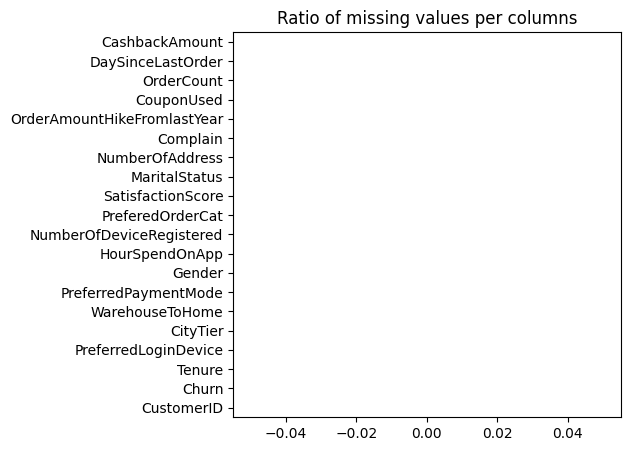

Detail Numbers of Missing Values per columns:


,0
CustomerID,0
Churn,0
DaySinceLastOrder,0
OrderCount,0
CouponUsed,0
OrderAmountHikeFromlastYear,0
Complain,0
NumberOfAddress,0
MaritalStatus,0
SatisfactionScore,0


In [15]:
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()
print('Detail Numbers of Missing Values per columns:')
data.isna().sum().sort_values(ascending=False)

# Feature Engineering

In [16]:
data=data.drop('CustomerID',axis=1)

##  Transforming Churn before EDA

In [17]:
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,10.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,10.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,2.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [18]:
data=data.rename(columns={'Churn':'Retention'})

In [19]:
y=data['Retention']
data=data.drop('Retention', axis=1)

In [20]:
y=y.replace({1:0,0:1})

In [21]:
y.value_counts()

,count
Retention,
1,4682
0,948


## Refactoring City Tier and Satisfaction Score

In [22]:
def refactor_citytier(df):
    conditions = [(df['CityTier'] == 1),
                    (df['CityTier'] == 2),
                    (df['CityTier'] == 3),
    ]

    choices = ['Metropolises', 'RapidlyGrowing', 'Developing']
    df['CityTier'] = np.select(conditions, choices, default='Unknown')
    return df
data=refactor_citytier(data)

In [23]:
def refactor_satisfactionscore(df):
    conditions = [
        (df['SatisfactionScore'] == 5),
        (df['SatisfactionScore'] == 4),
        (df['SatisfactionScore'] == 3),
        (df['SatisfactionScore'] == 2),
        (df['SatisfactionScore'] == 1)
    ]

    choices = ['Excellent', 'Very Good', 'Good', 'Average', 'Worst']
    df['SatisfactionScore'] = np.select(conditions, choices, default='Unknown')
    return df

data = refactor_satisfactionscore(data)

In [24]:
data.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,Developing,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,Average,Single,9,1,11.0,1.0,1.0,5.0,160
1,10.0,Phone,Metropolises,8.0,UPI,Male,3.0,4,Mobile,Good,Single,7,1,15.0,0.0,1.0,0.0,121
2,10.0,Phone,Metropolises,30.0,Debit Card,Male,2.0,4,Mobile,Good,Single,6,1,14.0,0.0,1.0,3.0,120
3,0.0,Phone,Developing,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,Excellent,Single,8,0,23.0,0.0,1.0,3.0,134
4,0.0,Phone,Metropolises,12.0,CC,Male,2.0,3,Mobile,Excellent,Single,3,0,11.0,1.0,1.0,3.0,130


# Outlier Detection

In [25]:
data.shape

(5630, 18)

In [26]:
sample= data.select_dtypes(include=['int64','float64'])

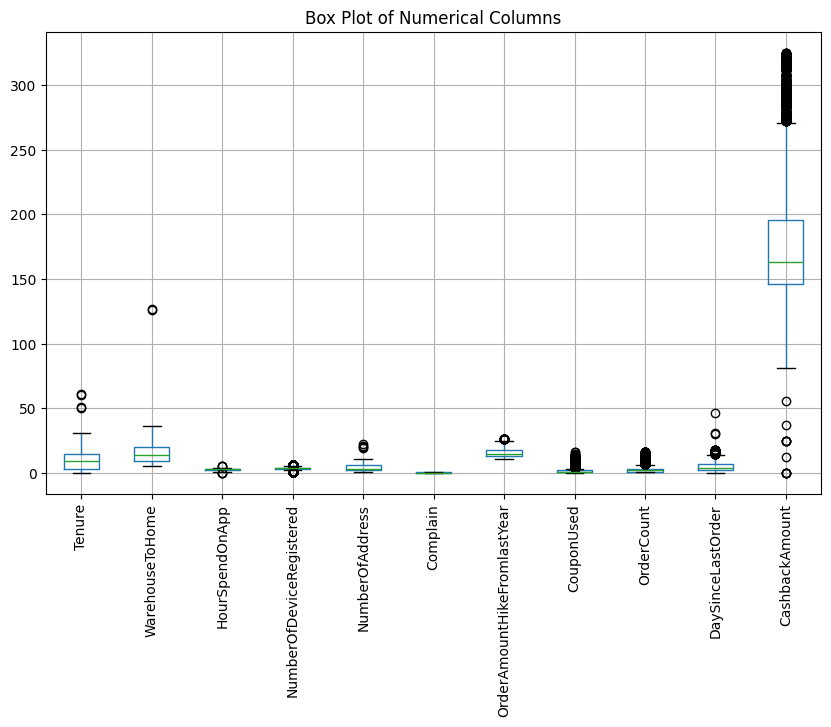

In [27]:
plt.figure(figsize=(10, 6))
data[sample.columns].boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Columns')
plt.show()

Text(0, 0.5, 'Values')

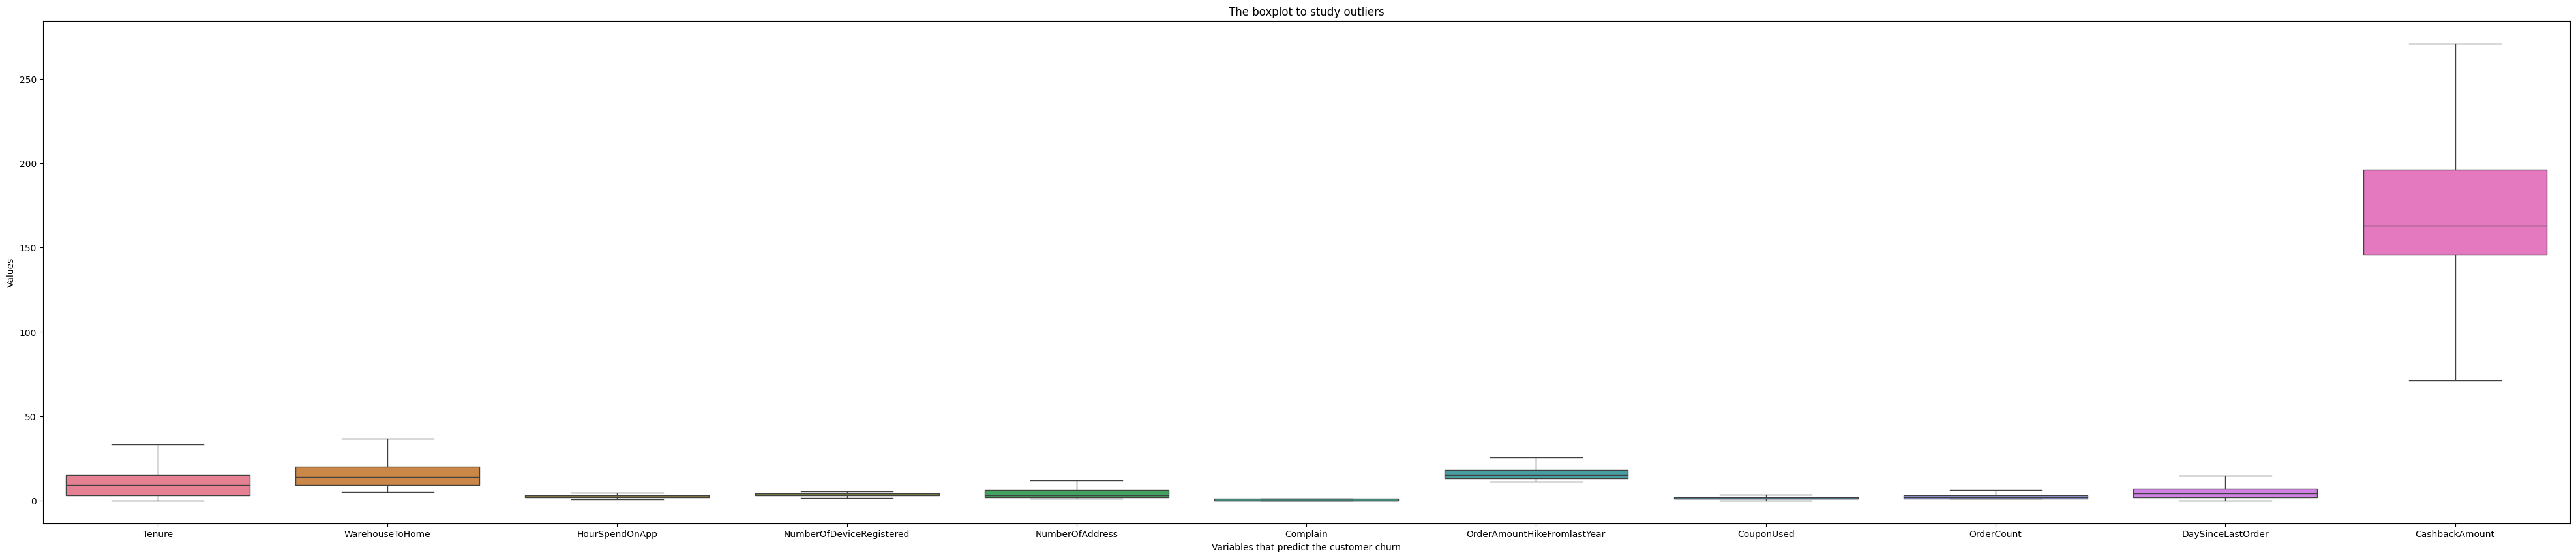

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    l= Q1-(1.5 * IQR)
    u= Q3+(1.5 * IQR)
    return l, u

for column in sample.columns:
    if data[column].dtype != 'object':
        l,u=remove_outlier(data[column])
        data[column]=np.where(data[column]>u,u,data[column])
        data[column]=np.where(data[column]<l,l,data[column])

plt.figure(figsize=(50,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')


In [29]:
from lifelines import KaplanMeierFitter
kmf=KaplanMeierFitter()
kmf.fit(durations=data['Tenure'], event_observed=y)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=kmf.survival_function_.index,
    y=kmf.survival_function_['KM_estimate'],
    mode='lines',
    name='Survival Function'
))


fig.update_layout(
    title="Kaplan-Meier Survival Function",
    xaxis_title="Time (Tenure)",
    yaxis_title="Survival Probability",
    template="plotly_white"
)

fig.show()

In [30]:
fig = px.histogram(data, x="Tenure", nbins=30, marginal="violin", opacity=0.7,
                   title="Distribution of Customer Tenure")
fig.update_layout(
    xaxis_title="Tenure (Time with company)",
    yaxis_title="Frequency",
    template="plotly_white"
)
fig.show()

In [31]:
fig = go.Figure()
categorical=data.select_dtypes(include=['category', 'object']).columns.tolist()
for col in categorical:
    fig.add_trace(go.Box(x=y, y=data[col], name=col))
fig.update_layout(
    title='Feature Distributions by Target',
    xaxis_title='Target',
    yaxis_title='Feature Value'
)
fig.show()

In [32]:
print(categorical)

['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus']


In [33]:
for col in categorical:
    fig = px.histogram(
        data,
        x=col,
        color=y,  # Target variable
        barmode='stack',
        title=f"Impact of {col} on Target (Retention)",
        labels={'color': 'Retention'}
    )
    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        template="plotly_white"
    )
    fig.show()

In [34]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

numerical_cols=data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 1. Distribution and Target Relationship
def analyze_numerical_features(X, y, numerical_cols):
    n_cols = len(numerical_cols)
    fig = make_subplots(rows=n_cols, cols=2,
                       subplot_titles=[f"{col} Distribution" for col in numerical_cols] +
                                    [f"{col} vs Target" for col in numerical_cols])

    for i, col in enumerate(numerical_cols, 1):
        # Histogram
        fig.add_trace(
            go.Histogram(x=X[col], name=col, nbinsx=30),
            row=i, col=1
        )

        # Box plot by target
        fig.add_trace(
            go.Box(x=y, y=X[col], name=col),
            row=i, col=2
        )

    fig.update_layout(height=300*n_cols,
                     title_text="Numerical Features Analysis",
                     showlegend=False)
    fig.show()

    # Summary statistics
    print("\nSummary Statistics:")
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"Mean: {X[col].mean():.2f}")
        print(f"Std: {X[col].std():.2f}")
        print(f"Range: [{X[col].min():.2f}, {X[col].max():.2f}]")
        print(f"Effect size (Cohen's d): {cohen_d(X[col], y):.2f}")

def cohen_d(feature, target):
    """Calculate Cohen's d effect size"""
    pos = feature[target == 1]
    neg = feature[target == 0]
    d = (pos.mean() - neg.mean()) / np.sqrt((pos.var() + neg.var()) / 2)
    return abs(d)

# Call the function
analyze_numerical_features(data, y, numerical_cols)




Summary Statistics:

Tenure:
Mean: 10.17
Std: 8.29
Range: [0.00, 33.00]
Effect size (Cohen's d): 1.07

WarehouseToHome:
Mean: 15.58
Std: 8.08
Range: [5.00, 36.50]
Effect size (Cohen's d): 0.20

HourSpendOnApp:
Mean: 2.89
Std: 0.73
Range: [0.50, 4.50]
Effect size (Cohen's d): 0.02

NumberOfDeviceRegistered:
Mean: 3.70
Std: 0.94
Range: [1.50, 5.50]
Effect size (Cohen's d): 0.29

NumberOfAddress:
Mean: 4.21
Std: 2.56
Range: [1.00, 12.00]
Effect size (Cohen's d): 0.11

Complain:
Mean: 0.28
Std: 0.45
Range: [0.00, 1.00]
Effect size (Cohen's d): 0.65

OrderAmountHikeFromlastYear:
Mean: 15.67
Std: 3.58
Range: [11.00, 25.50]
Effect size (Cohen's d): 0.02

CouponUsed:
Mean: 1.44
Std: 1.07
Range: [0.00, 3.50]
Effect size (Cohen's d): 0.02

OrderCount:
Mean: 2.57
Std: 1.71
Range: [1.00, 6.00]
Effect size (Cohen's d): 0.10

DaySinceLastOrder:
Mean: 4.48
Std: 3.42
Range: [0.00, 14.50]
Effect size (Cohen's d): 0.46

CashbackAmount:
Mean: 175.23
Std: 43.83
Range: [71.00, 271.00]
Effect size (Cohen's

In [35]:
fig = make_subplots(rows=3, cols=4, subplot_titles=numerical_cols)

row, col = 1, 1
for i, column in enumerate(numerical_cols):

    fig.add_trace(
        go.Histogram(x=data[column], nbinsx=20, name=column, marker=dict(color='blue', opacity=0.7)),
        row=row, col=col
    )

    col += 1
    if col > 4:
        col = 1
        row += 1
fig.update_layout(
    height=800, width=1200, title_text="Distribution of Numerical Features",
    showlegend=False, template="plotly_dark"
)

fig.show()

## Model Preprocessing

In [36]:
for col in data:
  if data[col].dtypes=='object':
    data=data.drop(col,axis=1)

In [37]:
data

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,10.0,8.0,3.0,4.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,10.0,30.0,2.0,4.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,0.0,15.0,2.0,4.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,0.0,12.0,2.0,3.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,13.0,13.0,3.0,5.0,6.0,0.0,16.0,1.0,2.0,4.0,225.0
5627,1.0,11.0,3.0,2.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,23.0,9.0,4.0,5.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough')

In [39]:
X=preprocessor.fit_transform(data)

In [40]:
feature_names = preprocessor.get_feature_names_out()

In [41]:
data_transformed = pd.DataFrame(X, columns=feature_names)

In [42]:
data_transformed

,num__Tenure,num__WarehouseToHome,num__HourSpendOnApp,num__NumberOfDeviceRegistered,num__NumberOfAddress,num__Complain,num__OrderAmountHikeFromlastYear,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,-0.743940,-1.185161,0.151627,-0.738345,1.875626,1.584290,-1.304023,-0.411136,-0.916153,0.150815,-0.347374
1,-0.019912,-0.937721,0.151627,0.323303,1.092812,1.584290,-0.187486,-1.344668,-0.916153,-1.309602,-1.237164
2,-0.019912,1.784114,-1.218616,0.323303,0.701405,1.584290,-0.466620,-1.344668,-0.916153,-0.433352,-1.259980
3,-1.226626,-0.071683,-1.218616,0.323303,1.484219,-0.631198,2.045589,-1.344668,-0.916153,-0.433352,-0.940568
4,-1.226626,-0.442842,-1.218616,-0.738345,-0.472817,-0.631198,-1.304023,-0.411136,-0.916153,-0.433352,-1.031828
...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.019912,1.784114,0.151627,-1.799993,0.701405,-0.631198,0.649917,-0.411136,-0.331286,-0.141269,-0.552710
5626,0.342102,-0.319122,0.151627,1.384951,0.701405,-0.631198,0.091648,-0.411136,-0.331286,-0.141269,1.135611
5627,-1.105954,-0.566562,0.151627,-1.799993,-0.472817,1.584290,1.487320,-0.411136,-0.331286,-0.141269,0.245820
5628,1.548816,-0.814002,1.521871,1.384951,-0.081410,-0.631198,-0.187486,0.522397,-0.331286,1.319148,0.086114


# Bayesian Modelling

In [43]:
strong_weibull=['Tenure','Complain']
medium_weibull=['DaySinceLastOrder','CashbackAmount']
weak_weibull=['OrderAmountHikeFromlastYear','OrderCount']
weak_normal=['HourSpendOnApp','NumberOfDeviceRegistered','CouponUsed']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data_transformed, y, test_size=0.20, random_state=42)

In [45]:
X_train

,num__Tenure,num__WarehouseToHome,num__HourSpendOnApp,num__NumberOfDeviceRegistered,num__NumberOfAddress,num__Complain,num__OrderAmountHikeFromlastYear,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
4478,-1.105954,-0.442842,0.151627,0.323303,-0.472817,1.584290,-0.745755,-0.411136,-0.331286,-0.433352,-0.575525
3685,0.824788,-0.319122,1.521871,1.384951,-0.472817,1.584290,-0.187486,0.522397,-0.331286,1.319148,-0.210483
731,-1.226626,-0.814002,-1.218616,0.323303,-0.864224,-0.631198,-1.024889,-1.344668,-0.916153,-0.725436,-1.031828
291,-0.019912,-0.937721,-1.218616,-0.738345,-0.864224,1.584290,2.045589,-0.411136,-0.916153,-1.309602,-1.328425
184,-0.743940,-0.566562,-1.218616,-0.738345,-1.255632,1.584290,-1.024889,-1.344668,-0.916153,-0.433352,-0.621155
...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.105954,1.412955,1.521871,0.323303,-0.864224,-0.631198,-0.187486,0.522397,-0.331286,-0.433352,-0.621155
5191,-0.019912,0.052037,0.151627,0.323303,0.701405,-0.631198,-1.024889,1.922695,1.423315,-0.141269,1.158426
5226,-0.381926,-0.566562,0.151627,1.384951,2.267033,-0.631198,-1.024889,0.522397,-0.331286,-0.433352,-0.278928
5390,-1.105954,2.526433,1.521871,0.323303,-0.472817,-0.631198,-0.466620,0.522397,-0.331286,-0.433352,-0.256113


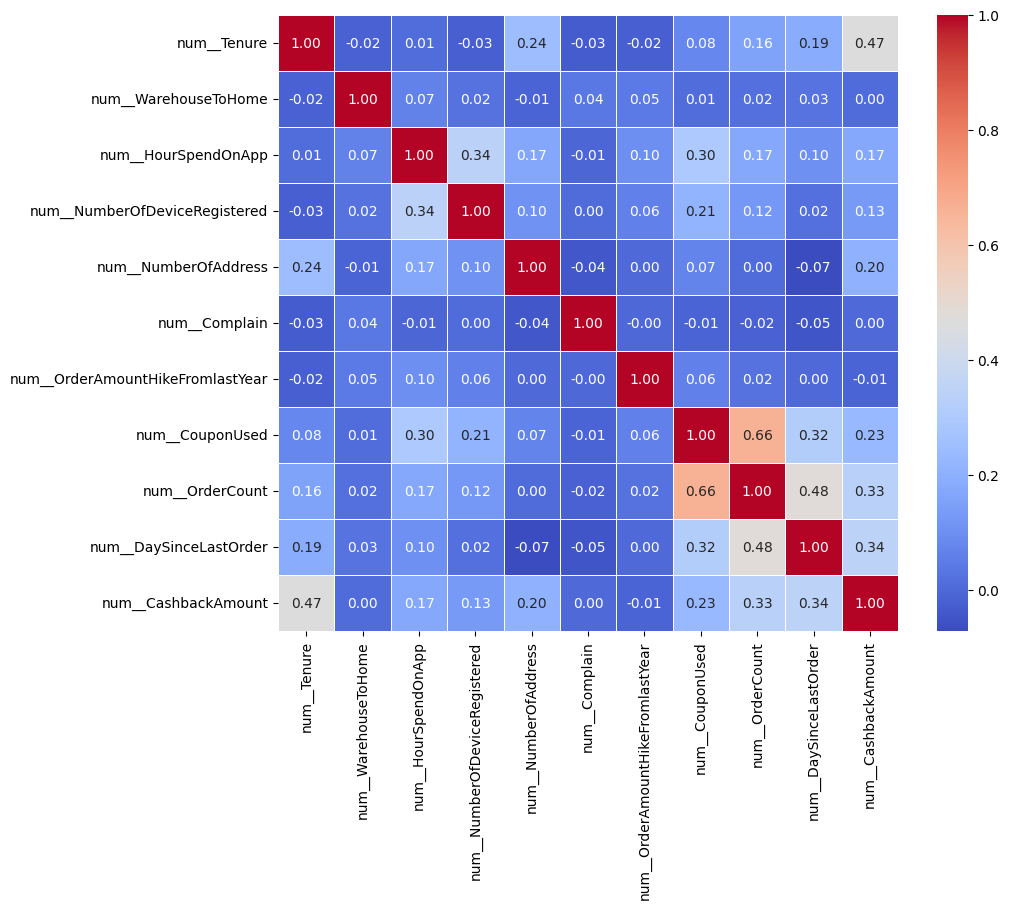

Removed columns: set()


In [46]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()
columns_to_drop = set()

threshold = 0.7

highly_correlated = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            columns_to_drop.add(col)

X_train_cleaned = X_train.drop(columns=columns_to_drop)

print(f"Removed columns: {columns_to_drop}")


In [47]:
import pymc as pm

with pm.Model() as model:
    # Use SkewNormal for the betas (with location, scale, and skewness parameters)
    beta = pm.SkewNormal('beta', mu=0, sigma=1, alpha=2, shape=X_train.shape[1])  # Adjust alpha to control skewness
    intercept = pm.SkewNormal('intercept', mu=0, sigma=1, alpha=2)  # Same for intercept, you can adjust the skewness here too

    # Linear combination for logistic regression
    p = pm.math.sigmoid(pm.math.dot(X_train, beta) + intercept)

    # Likelihood for the outcome (Bernoulli)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y_train)

    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=1000, cores=4, return_inferencedata=True)




Output()

<Axes: >

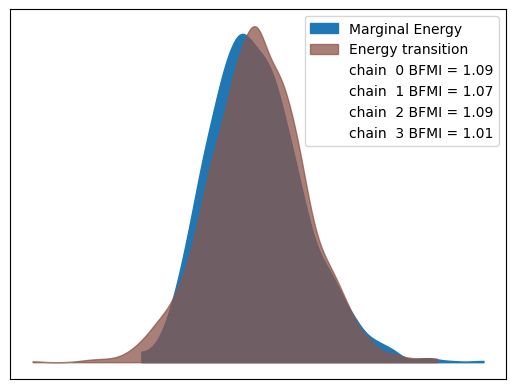

In [48]:
import arviz as az
az.plot_energy(trace)


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

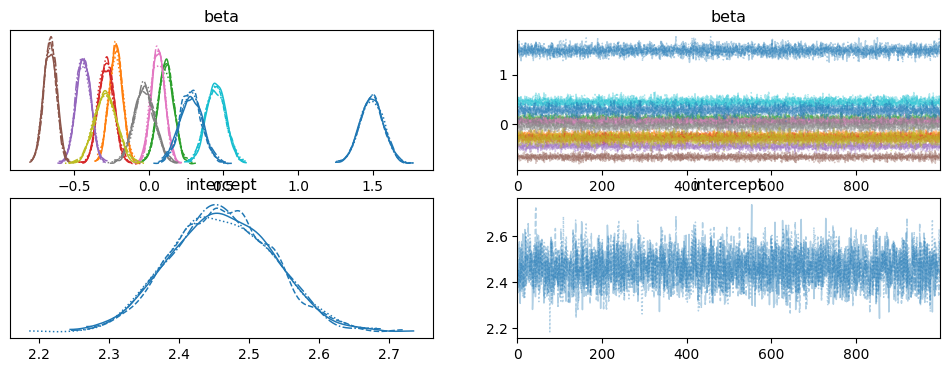

In [49]:
import arviz as az
az.plot_trace(trace)


### Summary

array([[<Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n2'}>],
       [<Axes: title={'center': 'beta\n3'}>,
        <Axes: title={'center': 'beta\n4'}>,
        <Axes: title={'center': 'beta\n5'}>],
       [<Axes: title={'center': 'beta\n6'}>,
        <Axes: title={'center': 'beta\n7'}>,
        <Axes: title={'center': 'beta\n8'}>],
       [<Axes: title={'center': 'beta\n9'}>,
        <Axes: title={'center': 'beta\n10'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

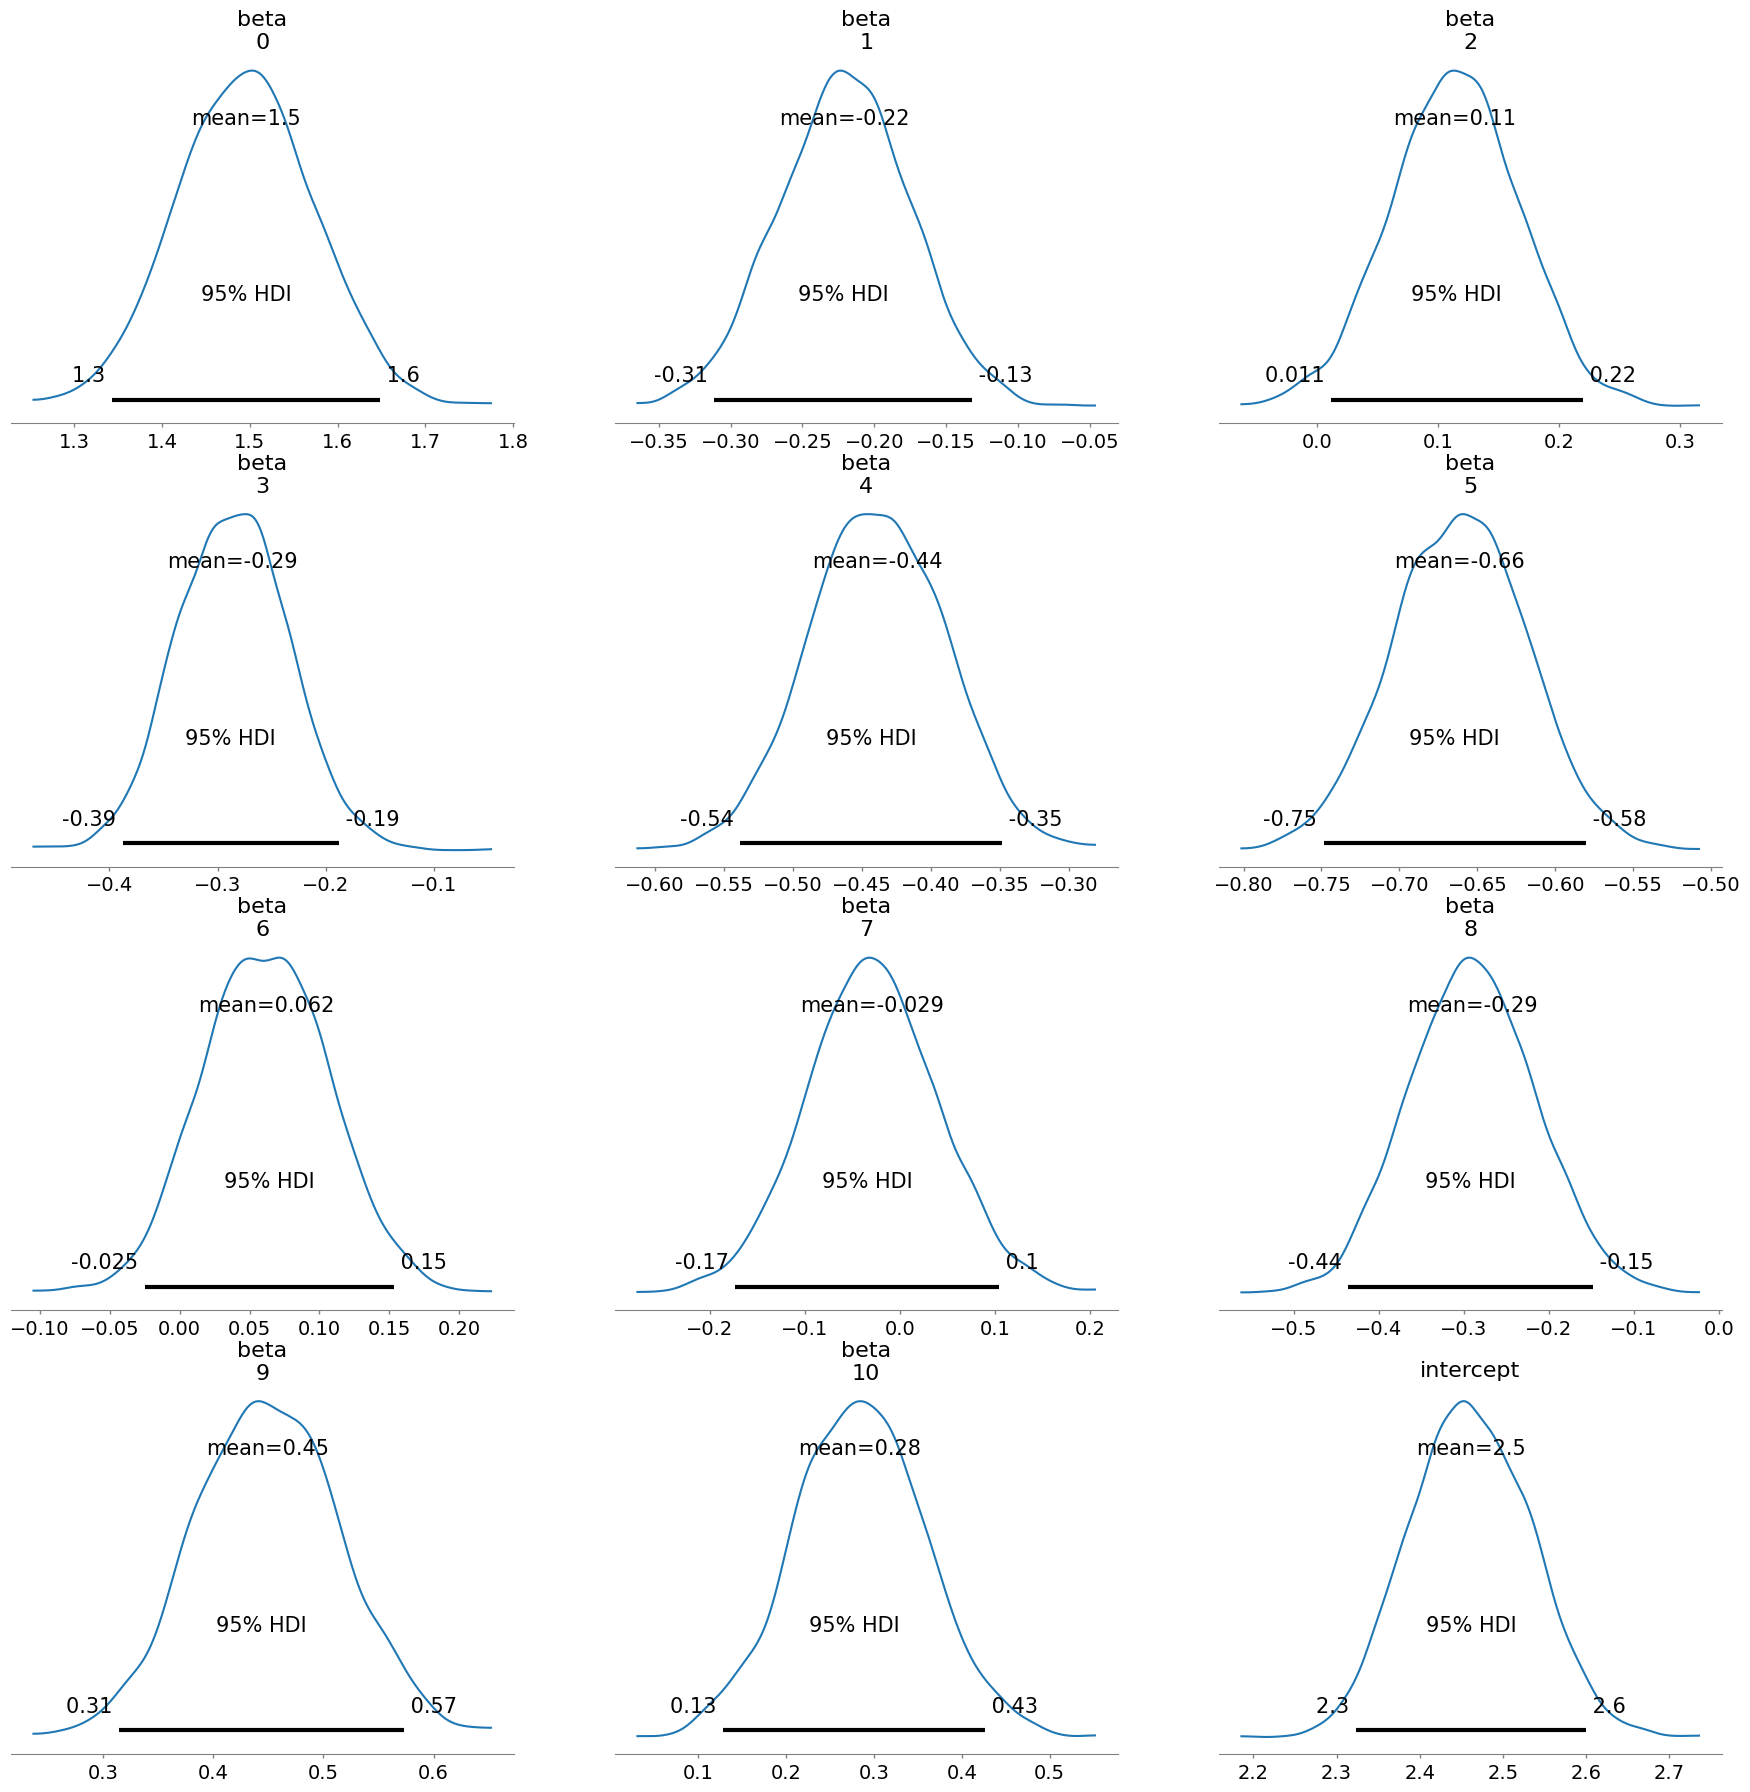

In [50]:
az.plot_posterior(trace, hdi_prob=0.95)

In [51]:
summary = az.summary(trace, var_names=["beta"])

In [52]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],1.495,0.079,1.354,1.647,0.001,0.001,3887.0,3330.0,1.0
beta[1],-0.221,0.046,-0.311,-0.139,0.001,0.000,6627.0,2410.0,1.0
beta[2],0.114,0.053,0.013,0.210,0.001,0.001,5316.0,3095.0,1.0
beta[3],-0.286,0.052,-0.382,-0.190,0.001,0.000,6226.0,2906.0,1.0
beta[4],-0.439,0.049,-0.531,-0.350,0.001,0.000,5680.0,3412.0,1.0
beta[5],-0.661,0.043,-0.741,-0.581,0.001,0.000,5935.0,3188.0,1.0
beta[6],0.062,0.046,-0.024,0.146,0.001,0.001,7092.0,2680.0,1.0
beta[7],-0.029,0.070,-0.158,0.104,0.001,0.001,5140.0,3177.0,1.0
beta[8],-0.290,0.075,-0.426,-0.148,0.001,0.001,4691.0,3442.0,1.0
beta[9],0.449,0.066,0.323,0.571,0.001,0.001,5951.0,3192.0,1.0


In [54]:
beta_mean = trace.posterior['beta'].mean(dim=['chain', 'draw']).values

In [55]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': beta_mean
})

print(feature_importance.sort_values(by='Importance', ascending=False))

                             Feature  Importance
0                        num__Tenure    1.495111
9             num__DaySinceLastOrder    0.449251
10               num__CashbackAmount    0.283499
2                num__HourSpendOnApp    0.113878
6   num__OrderAmountHikeFromlastYear    0.061832
7                    num__CouponUsed   -0.028906
1               num__WarehouseToHome   -0.221036
3      num__NumberOfDeviceRegistered   -0.285719
8                    num__OrderCount   -0.289631
4               num__NumberOfAddress   -0.438815
5                      num__Complain   -0.661343


In [56]:
beta_posterior = az.summary(trace, var_names=["beta"], hdi_prob=0.95)
beta_mean = beta_posterior['mean'].values
Feature= X_train.columns.tolist()
if len(Feature) != len(beta_mean):
    print("Warning: The number of features and beta coefficients do not match.")
else:

     for i, beta_val in enumerate(beta_mean):
        print(f"Feature: {Feature[i]}, Beta: {beta_val}")



Feature: num__Tenure, Beta: 1.495
Feature: num__WarehouseToHome, Beta: -0.221
Feature: num__HourSpendOnApp, Beta: 0.114
Feature: num__NumberOfDeviceRegistered, Beta: -0.286
Feature: num__NumberOfAddress, Beta: -0.439
Feature: num__Complain, Beta: -0.661
Feature: num__OrderAmountHikeFromlastYear, Beta: 0.062
Feature: num__CouponUsed, Beta: -0.029
Feature: num__OrderCount, Beta: -0.29
Feature: num__DaySinceLastOrder, Beta: 0.449
Feature: num__CashbackAmount, Beta: 0.283


In [57]:
params = summary.index
means = summary['mean']
lower_bounds = summary['hdi_3%']
upper_bounds= summary['hdi_97%']

In [58]:
summary_df = pd.DataFrame({
    'Feature':Feature,
    'Mean': means,

    'HDI_Lower': lower_bounds,
    'HDI_Upper': upper_bounds
})

In [59]:
summary_df

,Feature,Mean,HDI_Lower,HDI_Upper
beta[0],num__Tenure,1.495,1.354,1.647
beta[1],num__WarehouseToHome,-0.221,-0.311,-0.139
beta[2],num__HourSpendOnApp,0.114,0.013,0.210
beta[3],num__NumberOfDeviceRegistered,-0.286,-0.382,-0.190
beta[4],num__NumberOfAddress,-0.439,-0.531,-0.350
beta[5],num__Complain,-0.661,-0.741,-0.581
beta[6],num__OrderAmountHikeFromlastYear,0.062,-0.024,0.146
beta[7],num__CouponUsed,-0.029,-0.158,0.104
beta[8],num__OrderCount,-0.290,-0.426,-0.148
beta[9],num__DaySinceLastOrder,0.449,0.323,0.571


In [60]:
fig = go.Figure()

for i, param in enumerate(params):
    fig.add_trace(go.Scatter(
        x=[means[i]],
        y=[param],
        mode='markers',
        marker=dict(size=10, color='blue'),
        name=param
    ))
    fig.add_trace(go.Scatter(
        x=[lower_bounds[i], upper_bounds[i]],
        y=[param, param],
        mode='lines',
        line=dict(color='blue', width=2),
        name=f"{param} CI"
    ))


fig.add_trace(go.Scatter(
    x=[0, 0],
    y=[params[0], params[-1]],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Zero Reference'
))

fig.update_layout(
    title="Posterior Means and 95% Credible Intervals",
    xaxis_title="Parameter Value",
    yaxis_title="Parameters",
    yaxis=dict(tickmode='array', tickvals=list(range(len(params))), ticktext=params),
    showlegend=False,
    height=800
)

fig.show()

<ipython-input-60-16c9fd809b47>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-60-16c9fd809b47>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Original Retention Rate

In [61]:
beta_mean = trace.posterior['beta'].mean(dim=['chain', 'draw']).values
intercept_mean = trace.posterior['intercept'].mean(dim=['chain', 'draw']).values

y_pred_original = (pm.math.sigmoid(pm.math.dot(X_train, beta_mean) + intercept_mean).eval() > 0.5).astype(int)
retention_rate_original = (y_pred_original == 0).mean()
print("Original Retention Rate:", retention_rate_original)



Original Retention Rate: 0.0941385435168739


# Tweaking Values

In [62]:
X_simulated = data_transformed.copy()

In [63]:
X_simulated

,num__Tenure,num__WarehouseToHome,num__HourSpendOnApp,num__NumberOfDeviceRegistered,num__NumberOfAddress,num__Complain,num__OrderAmountHikeFromlastYear,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,-0.743940,-1.185161,0.151627,-0.738345,1.875626,1.584290,-1.304023,-0.411136,-0.916153,0.150815,-0.347374
1,-0.019912,-0.937721,0.151627,0.323303,1.092812,1.584290,-0.187486,-1.344668,-0.916153,-1.309602,-1.237164
2,-0.019912,1.784114,-1.218616,0.323303,0.701405,1.584290,-0.466620,-1.344668,-0.916153,-0.433352,-1.259980
3,-1.226626,-0.071683,-1.218616,0.323303,1.484219,-0.631198,2.045589,-1.344668,-0.916153,-0.433352,-0.940568
4,-1.226626,-0.442842,-1.218616,-0.738345,-0.472817,-0.631198,-1.304023,-0.411136,-0.916153,-0.433352,-1.031828
...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.019912,1.784114,0.151627,-1.799993,0.701405,-0.631198,0.649917,-0.411136,-0.331286,-0.141269,-0.552710
5626,0.342102,-0.319122,0.151627,1.384951,0.701405,-0.631198,0.091648,-0.411136,-0.331286,-0.141269,1.135611
5627,-1.105954,-0.566562,0.151627,-1.799993,-0.472817,1.584290,1.487320,-0.411136,-0.331286,-0.141269,0.245820
5628,1.548816,-0.814002,1.521871,1.384951,-0.081410,-0.631198,-0.187486,0.522397,-0.331286,1.319148,0.086114


In [64]:
top_positive_features= summary_df[summary_df['Mean'] > 0].nlargest(4, 'Mean')
top_positive_features_names = top_positive_features['Feature'].tolist()

In [65]:
top_positive_features


,Feature,Mean,HDI_Lower,HDI_Upper
beta[0],num__Tenure,1.495,1.354,1.647
beta[9],num__DaySinceLastOrder,0.449,0.323,0.571
beta[10],num__CashbackAmount,0.283,0.136,0.422
beta[2],num__HourSpendOnApp,0.114,0.013,0.210


In [66]:
top_positive_features_names

['num__Tenure',
 'num__DaySinceLastOrder',
 'num__CashbackAmount',
 'num__HourSpendOnApp']

In [67]:
for feature in top_positive_features_names:
    if feature in X_simulated.columns:
        X_simulated[feature] = X_simulated[feature] * 1.2

In [68]:
with model:
    p_simulated = pm.math.sigmoid(pm.math.dot(X_simulated, beta_mean) + intercept_mean)
    y_pred_simulated = (p_simulated.eval() > 0.5).astype(int)

In [69]:
retention_rate_simulated = (y_pred_simulated == 0).mean()
print("Simulated Retention Rate:", retention_rate_simulated)

Simulated Retention Rate: 0.12380106571936057


To calculate the current hike in retention rate, you can use the following formula:

Retention Rate Hike (%)
=
(
New Retention Rate
−
Original Retention Rate
Original Retention Rate
)
×
100
Retention Rate Hike (%)=(
Original Retention Rate
New Retention Rate−Original Retention Rate
​
 )×100
Using your values:

Original Retention Rate = 0.0937
New Retention Rate = 0.1246
Let's calculate the hike:

Retention Rate Hike (%)
=
(
0.1246
−
0.0937
0.0937
)
×
100
=
(
0.0309
0.0937
)
×
100
≈
32.98
%
Retention Rate Hike (%)=(
0.0937
0.1246−0.0937
​
 )×100=(
0.0937
0.0309
​
 )×100≈32.98%

In [71]:
sorted_summary = summary_df.sort_values(by="Mean", ascending=False)
top_positive_features = sorted_summary.head(5)
top_negative_features = sorted_summary.tail(5)

print("Top Positive Features:\n", top_positive_features[[ "Feature","Mean", "HDI_Lower", "HDI_Upper"]])
print("Top Negative Features:\n", top_negative_features[[ "Feature","Mean", "HDI_Lower", "HDI_Upper"]])

Top Positive Features:
                                    Feature   Mean  HDI_Lower  HDI_Upper
beta[0]                        num__Tenure  1.495      1.354      1.647
beta[9]             num__DaySinceLastOrder  0.449      0.323      0.571
beta[10]               num__CashbackAmount  0.283      0.136      0.422
beta[2]                num__HourSpendOnApp  0.114      0.013      0.210
beta[6]   num__OrderAmountHikeFromlastYear  0.062     -0.024      0.146
Top Negative Features:
                                Feature   Mean  HDI_Lower  HDI_Upper
beta[1]           num__WarehouseToHome -0.221     -0.311     -0.139
beta[3]  num__NumberOfDeviceRegistered -0.286     -0.382     -0.190
beta[8]                num__OrderCount -0.290     -0.426     -0.148
beta[4]           num__NumberOfAddress -0.439     -0.531     -0.350
beta[5]                  num__Complain -0.661     -0.741     -0.581
